## **0.0** Set Up

In [1]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

## **1.0** EDA & Data Prep

### application_data.csv

In [3]:
file_path = r'D:\5450\application_data.csv'
df_application = pd.read_csv(file_path)
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Initial Data Cleaning

#### 1. Check Nulls and Duplicates - Overall

In [4]:
print("Number of rows:", df_application.shape[0])
print("Number of columns:", df_application.shape[1])
num_dups = df_application.duplicated().sum()
print("Number of duplicate rows:", num_dups)
num_nulls = df_application.isnull().any(axis=1).sum()
print("Number of rows with null values:", num_nulls)

Number of rows: 307511
Number of columns: 122
Number of duplicate rows: 0
Number of rows with null values: 298909


#### 2. Check target variable

In [5]:
df_application['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

#### 3. Drop Columns with Missing rate >20%

In [6]:
#check missing percentage
na_percentage = (df_application.isna().sum() / len(df_application)) * 100
na_percentage_df = na_percentage.to_frame(name='NaN_Percentage').sort_values(by='NaN_Percentage', ascending=False)
na_percentage_df2 = na_percentage_df.loc[na_percentage_df['NaN_Percentage'] >20]
na_percentage_df2.shape

(50, 1)

In [7]:
#na_percentage_df2.head(10)

In [8]:
df_application_clean = df_application.drop(na_percentage_df2.index, axis=1)
df_application_clean.shape

(307511, 72)

#### 4. Drop Rows with N/A value

In [9]:
df_application_clean= df_application_clean.dropna()
df_application_clean.shape

(244280, 72)

In [10]:
df_application_clean['TARGET'].value_counts()

TARGET
0    225248
1     19032
Name: count, dtype: int64

### Check & Process Data by Types

In [11]:
dtype_df = pd.DataFrame(df_application_clean.dtypes, columns=['DataType']).reset_index()
dtype_df.columns = ['ColumnName', 'DataType']
dtype_df['DataType'].value_counts()

DataType
int64      41
float64    20
object     11
Name: count, dtype: int64

### A. Flag (Boolean) Variables

In [12]:
flag_columns = [col for col in df_application_clean.columns if set(df_application_clean[col].unique()) <= {0, 1} or set(df_application_clean[col].unique()) <= {'Y', 'N'}]
flag_columns.remove('TARGET')
print(flag_columns)
# Convert identified flag columns to numeric 0 and 1
for col in flag_columns:
    df_application_clean[col] = df_application_clean[col].replace({'Y': 1, 'N': 0}).astype(int)


['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


C:\Users\ruoxi\AppData\Local\Temp\ipykernel_11596\568689019.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_application_clean[col] = df_application_clean[col].replace({'Y': 1, 'N': 0}).astype(int)
C:\Users\ruoxi\AppData\Local\Temp\ipykernel_11596\568689019.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_application_clean[col] = df_application_clean[col].replace({'Y': 1, 'N': 0}).astype(int)


In [13]:
df_application_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### B. Categorical Variables

In [14]:
non_numeric_df = df_application_clean.select_dtypes(exclude='number')

pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)     
pd.set_option('display.max_columns', None)  
    
unique_values_df = pd.DataFrame({col: [non_numeric_df[col].unique()] for col in non_numeric_df.columns}).transpose()
unique_values_df.columns = ['UniqueValues']
unique_values_df = unique_values_df.reset_index().rename(columns={'index': 'ColumnName'})
unique_values_df

,ColumnName,UniqueValues
0,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]"
1,CODE_GENDER,"[M, F, XNA]"
2,NAME_TYPE_SUITE,"[Unaccompanied, Spouse, partner, Children, Family, Other_A, Other_B, Group of people]"
3,NAME_INCOME_TYPE,"[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman]"
4,NAME_EDUCATION_TYPE,"[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]"
5,NAME_FAMILY_STATUS,"[Single / not married, Married, Widow, Civil marriage, Separated]"
6,NAME_HOUSING_TYPE,"[House / apartment, Rented apartment, Municipal apartment, With parents, Office apartment, Co-op apartment]"
7,WEEKDAY_APPR_PROCESS_START,"[WEDNESDAY, MONDAY, SUNDAY, SATURDAY, FRIDAY, THURSDAY, TUESDAY]"
8,ORGANIZATION_TYPE,"[Business Entity Type 3, Government, Other, XNA, Medicine, Business Entity Type 2, Self-employed, Housing, Kindergarten, Trade: type 7, Industry: type 11, Military, Transport: type 4, School, Services, Emergency, Security, Trade: type 2, University, Police, Construction, Business Entity Type 1, Industry: type 4, Agriculture, Restaurant, Transport: type 2, Hotel, Industry: type 7, Trade: type 3, Industry: type 3, Bank, Industry: type 9, Postal, Trade: type 6, Industry: type 2, Transport: type 1, Transport: type 3, Electricity, Industry: type 12, Insurance, Industry: type 1, Security Ministries, Mobile, Trade: type 1, Industry: type 5, Industry: type 10, Legal Services, Advertising, Trade: type 5, Cleaning, Industry: type 13, Industry: type 8, Realtor, Culture, Telecom, Religion, Industry: type 6, Trade: type 4]"


In [15]:
# Check domain value with 'XNA'
non_numeric_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      162361
M       81915
XNA         4
Name: count, dtype: int64

In [16]:
#Delete XNA for CODE_GENDER
df_application_clean2 = df_application_clean.drop(df_application_clean[df_application_clean['CODE_GENDER'] == 'XNA'].index)
df_application_clean2.reset_index(drop=True, inplace=True)
df_application_clean2.shape

(244276, 72)

In [17]:
non_numeric_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    53226
XNA                       43909
Self-employed             28535
Other                     13374
Medicine                   9464
Business Entity Type 2     8795
Government                 8690
School                     7488
Trade: type 7              5941
Kindergarten               5747
Construction               5180
Business Entity Type 1     4879
Transport: type 4          4292
Industry: type 9           2843
Trade: type 3              2769
Industry: type 3           2670
Security                   2580
Housing                    2394
Industry: type 11          2208
Military                   2195
Bank                       2063
Police                     2038
Transport: type 2          1926
Agriculture                1861
Security Ministries        1735
Postal                     1708
Trade: type 2              1428
Restaurant                 1353
Services                   1207
University                 1097
Industry: type 7      

In [18]:
check = df_application_clean2[['SK_ID_CURR','TARGET','ORGANIZATION_TYPE']].groupby(['ORGANIZATION_TYPE','TARGET']).count()
check.loc[['Other','XNA']]

SK_ID_CURR
ORGANIZATION_TYPE TARGET            
Other             0            12379
                  1              995
XNA               0            41639
                  1             2270

In [19]:
#Group XNA with Other
df_application_clean2['ORGANIZATION_TYPE'] = df_application_clean2['ORGANIZATION_TYPE'].replace('XNA', 'Other')

In [20]:
check = df_application_clean2[['SK_ID_CURR','TARGET','ORGANIZATION_TYPE']].groupby(['ORGANIZATION_TYPE','TARGET']).count()
check.loc[['Other']]

SK_ID_CURR
ORGANIZATION_TYPE TARGET            
Other             0            54018
                  1             3265

In [21]:
#One hot encoding
non_numeric_columns = df_application_clean2.select_dtypes(exclude='number').columns
encoded_application_clean = pd.get_dummies(df_application_clean2, columns=non_numeric_columns)

In [22]:
encoded_application_clean.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade:

### C.Numerical Variables

In [23]:
numeric_columns= df_application_clean2.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['SK_ID_CURR','TARGET'])
numeric_columns = numeric_columns.drop(flag_columns)
numerical_summary = encoded_application_clean[numeric_columns].describe()
display(numerical_summary)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,244276.000000,2.442760e+05,2.442760e+05,244276.000000,2.442760e+05,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.000000,244276.00000,244276.000000
mean,0.424458,1.718670e+05,6.084740e+05,27205.595192,5.466429e+05,0.020747,-16134.893162,63619.595171,-4988.700961,-3051.456254,2.167348,2.054729,2.034850,12.104411,0.518439,0.510768,1.434852,0.144279,1.418068,0.100210,-996.763849,0.006382,0.006890,0.034477,0.276138,0.26407,1.901464
std,0.726917,2.574339e+05,4.044119e+05,14323.249293,3.710326e+05,0.013676,4297.238042,141215.000092,3519.683696,1489.535558,0.911461,0.502249,0.496762,3.241899,0.189122,0.194842,2.422940,0.447955,2.401941,0.362741,833.395377,0.083840,0.110143,0.204139,0.939155,0.60948,1.859787
min,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000001,0.000527,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.125000e+05,2.750400e+05,16713.000000,2.385000e+05,0.010006,-19724.000000,-2884.000000,-7482.000000,-4321.000000,2.000000,2.000000,2.000000,10.000000,0.400904,0.370650,0.000000,0.000000,0.000000,0.000000,-1611.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.575000e+05,5.212800e+05,25060.500000,4.500000e+05,0.018850,-15832.000000,-1281.000000,-4518.000000,-3336.000000,2.000000,2.000000,2.000000,12.000000,0.569991,0.535276,0.000000,0.000000,0.000000,0.000000,-812.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,1.000000,2.025000e+05,8.140410e+05,34780.500000,6.885000e+05,0.028663,-12602.000000,-307.000000,-2004.000000,-1818.000000,3.000000,2.000000,2.000000,14.000000,0.665158,0.669057,2.000000,0.000000,2.000000,0.000000,-293.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,0.855000,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,8.00000,23.000000


In [33]:
# standardize 
from sklearn.preprocessing import StandardScaler
encoded_application_clean_std = encoded_application_clean.copy()
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded_application_clean[numeric_columns])



### After Standardization ###
Total Variance: 27.0001
Skewness:
CNT_CHILDREN                     1.924701
AMT_INCOME_TOTAL               383.168157
AMT_CREDIT                       1.199433
AMT_ANNUITY                      1.518657
AMT_GOODS_PRICE                  1.308801
REGION_POPULATION_RELATIVE       1.487751
DAYS_BIRTH                      -0.111220
DAYS_EMPLOYED                    1.667117
DAYS_REGISTRATION               -0.584094
DAYS_ID_PUBLISH                  0.390190
CNT_FAM_MEMBERS                  0.973577
REGION_RATING_CLIENT             0.103782
REGION_RATING_CLIENT_W_CITY      0.073481
HOUR_APPR_PROCESS_START         -0.018132
EXT_SOURCE_2                    -0.822602
EXT_SOURCE_3                    -0.409233
OBS_30_CNT_SOCIAL_CIRCLE        14.228884
DEF_30_CNT_SOCIAL_CIRCLE         5.479254
OBS_60_CNT_SOCIAL_CIRCLE        14.138075
DEF_60_CNT_SOCIAL_CIRCLE         5.479829
DAYS_LAST_PHONE_CHANGE          -0.642264
AMT_REQ_CREDIT_BUREAU_HOUR      14.643642
AMT_REQ_CRE

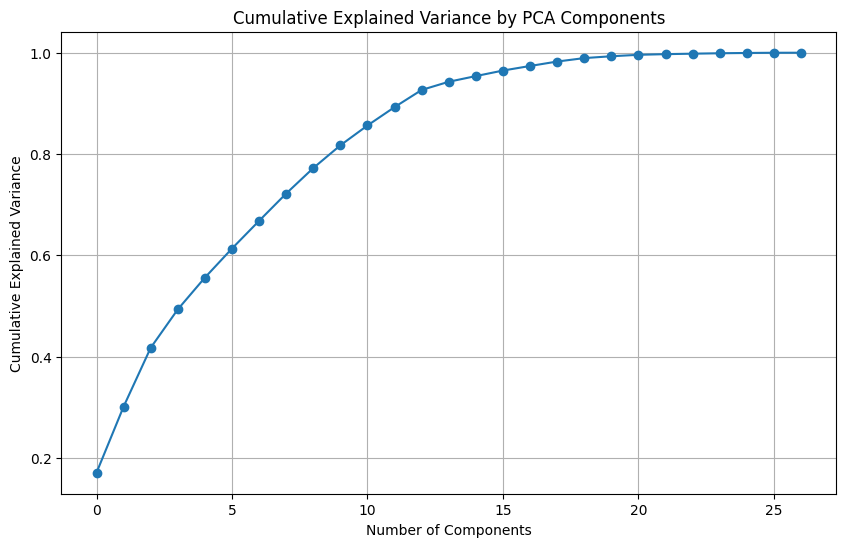

Optimal number of PCA components to retain 95% variance: 15


In [34]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Calculate Statistics Before and After Standardization
def calculate_statistics(data, label):
    variance = data.var().sum()
    skewness = data.apply(lambda x: skew(x))
    kurtosis_values = data.apply(lambda x: kurtosis(x))
    print(f"\n### {label} ###")
    print(f"Total Variance: {variance:.4f}")
    print(f"Skewness:\n{skewness}")
    print(f"Kurtosis:\n{kurtosis_values}")
    return variance, skewness, kurtosis_values

# Calculate statistics before standardization
variance_before, skewness_before, kurtosis_before = calculate_statistics(
    pd.DataFrame(X_scaled, columns=numeric_columns), "After Standardization"
)

# Step 2: Yeo-Johnson Transformation for Handling Skewness and Kurtosis
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_transformed = transformer.fit_transform(X_scaled)
X_transformed_df = pd.DataFrame(X_transformed, columns=numeric_columns)

# Calculate statistics after Yeo-Johnson transformation
variance_after_transform, skewness_after_transform, kurtosis_after_transform = calculate_statistics(
    X_transformed_df, "After Yeo-Johnson Transformation"
)

# Step 3: PCA Analysis
pca = PCA()
pca_transformed = pca.fit_transform(X_transformed)

# Plot cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# Determine the optimal number of components (95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCA components to retain 95% variance: {optimal_components}")

# Step 4: Apply PCA with Optimal Number of Components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_transformed)



In [32]:
#Final Dataset- ready for feature selection
encoded_application_clean_std.head(5)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade:

### Feature Selection

#### Lasso

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [38]:
df = encoded_application_clean  # make a duplicate just in case

# Separate features and target variable
X = df.drop(columns=['TARGET'])  # Features
y = df['TARGET']                 # Target

# Standardize the features for Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Lasso Regression for feature selection
lasso = Lasso(alpha=0.001)  # higher alpha = stronger penalty
lasso.fit(X_train, y_train)

# Extract features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0].tolist()

print("Selected Features by Lasso Regression:")
print(selected_features)
print("Number of selected features:", len(selected_features))

Selected Features by Lasso Regression:
['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATI

In [39]:
# Create a duplicate of the encoded DataFrame (optional, for safety)
df = encoded_application_clean.copy()

# Separate features and target variable
# Use PCA-transformed features instead of original features
X = X_pca_optimal  # PCA-transformed features from the previous cell
y = df['TARGET']   # Target variable

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso Regression for feature selection on PCA-transformed data
lasso = Lasso(alpha=0.001)  # Regularization strength (higher alpha = stronger penalty)
lasso.fit(X_train, y_train)

# Extract indices of PCA components with non-zero coefficients
selected_pca_components = [i for i, coef in enumerate(lasso.coef_) if coef != 0]

print("Selected PCA Components by Lasso Regression:")
print(selected_pca_components)
print("Number of selected PCA components:", len(selected_pca_components))


Selected PCA Components by Lasso Regression:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Number of selected PCA components: 15


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Filter the training and testing sets to only include selected features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

# Step 2: Train and evaluate Random Forest model using all features
rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train, y_train)

y_pred_all = rf_all_features.predict(X_test)
y_pred_proba_all = rf_all_features.predict_proba(X_test)[:, 1]

# Evaluate model with all features
accuracy_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_proba_all)

print("Random Forest Performance with All Features:")
print(f"Accuracy: {accuracy_all:.4f}")
print(f"F1 Score: {f1_all:.4f}")
print(f"ROC AUC Score: {roc_auc_all:.4f}")

# Step 3: Train and evaluate Random Forest model using only Lasso-selected features
rf_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected_features.fit(X_train_selected, y_train)

y_pred_selected = rf_selected_features.predict(X_test_selected)
y_pred_proba_selected = rf_selected_features.predict_proba(X_test_selected)[:, 1]

# Evaluate model with Lasso-selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

print("\nRandom Forest Performance with Lasso-Selected Features:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1 Score: {f1_selected:.4f}")
print(f"ROC AUC Score: {roc_auc_selected:.4f}")

Random Forest Performance with All Features:
Accuracy: 0.9219
F1 Score: 0.0005
ROC AUC Score: 0.6868

Random Forest Performance with Lasso-Selected Features:
Accuracy: 0.9219
F1 Score: 0.0005
ROC AUC Score: 0.6868


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Use PCA-transformed features instead of the original features
X = X_pca_optimal  # PCA-transformed features from the previous PCA implementation
y = df['TARGET']   # Target variable

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train and evaluate Random Forest model using all PCA-transformed features
rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_all_features.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred_all = rf_all_features.predict(X_test)
y_pred_proba_all = rf_all_features.predict_proba(X_test)[:, 1]

# Evaluate model with all PCA components
accuracy_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_proba_all)

print("Random Forest Performance with All PCA Components:")
print(f"Accuracy: {accuracy_all:.4f}")
print(f"F1 Score: {f1_all:.4f}")
print(f"ROC AUC Score: {roc_auc_all:.4f}")

# Step 2: Train and evaluate Random Forest model using Lasso-selected PCA components
# Filter the training and testing sets to include only Lasso-selected components
X_train_selected = X_train[:, selected_pca_components]
X_test_selected = X_test[:, selected_pca_components]

rf_selected_features = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_selected_features.fit(X_train_selected, y_train)

# Make predictions and calculate probabilities
y_pred_selected = rf_selected_features.predict(X_test_selected)
y_pred_proba_selected = rf_selected_features.predict_proba(X_test_selected)[:, 1]

# Evaluate model with Lasso-selected PCA components
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

print("\nRandom Forest Performance with Lasso-Selected PCA Components:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1 Score: {f1_selected:.4f}")
print(f"ROC AUC Score: {roc_auc_selected:.4f}")


Random Forest Performance with All PCA Components:
Accuracy: 0.9220
F1 Score: 0.0026
ROC AUC Score: 0.6925

Random Forest Performance with Lasso-Selected PCA Components:
Accuracy: 0.9220
F1 Score: 0.0026
ROC AUC Score: 0.6925


### previous_application.csv - ignore for now

In [89]:
df_previous_application = pd.read_csv('previous_application.csv')
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_previous_application[df_previous_application['SK_ID_CURR']==100003]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
